In [49]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [50]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [51]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [52]:
# create engine to hawaii.sqlite

engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [53]:
# reflect the tables

Base = automap_base()
Base.prepare(engine, reflect=True)


In [54]:
# View all of the classes that automap found

Base.classes.keys()


['measurement', 'station']

In [55]:
# Save references to each table

measurement = Base.classes.measurement
station = Base.classes.station


In [56]:
# Create our session (link) from Python to the DB

session = Session(engine)


# Exploratory Precipitation Analysis

In [57]:
session.query(measurement).first().__dict__


{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fc1b89b2760>,
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397',
 'tobs': 65.0,
 'date': '2010-01-01'}

In [58]:
# Find the most recent date in the data set.

recent_dt = dt.datetime.strptime(session.query(measurement.date).order_by(measurement.date.desc()).first()[0], '%Y-%m-%d').date()

print("Most recent date: " + str(recent_dt))


Most recent date: 2017-08-23


In [69]:
year_before = dt.datetime.strptime(session.query(measurement.date).order_by(measurement.date.desc()).first()[0], '%Y-%m-%d').date() - dt.timedelta(days=365)



'2016-08-23'

<AxesSubplot:title={'center':'Daily Precipitation Observed in Hawaii'}, xlabel='Date', ylabel='Precipitation(in)'>

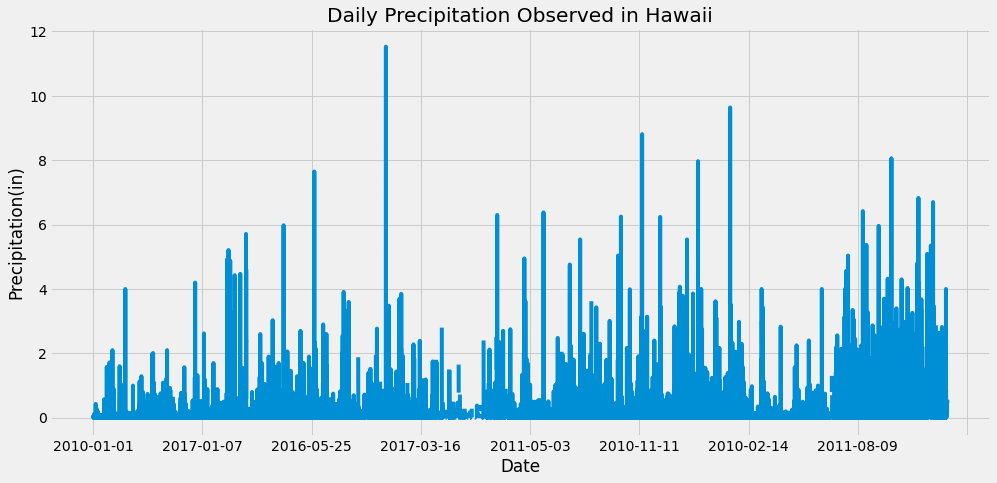

In [60]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.

year_before = recent_dt - dt.timedelta(days=365)


# Perform a query to retrieve the date and precipitation scores

df = pd.read_sql("SELECT date, prcp FROM measurement WHERE date >= " + str(year_before), engine.connect()).rename(columns={"date":"Date", "prcp":"Precipitation"})
df = df


# Sort the dataframe by date

df.sort_values(["Date"], ascending=True)


# Use Pandas Plotting with Matplotlib to plot the data

x = df["Date"]
y = df["Precipitation"]

df.plot("Date", "Precipitation", legend=False, ylabel="Precipitation(in)", figsize=(15,7), title="Daily Precipitation Observed in Hawaii")


In [61]:
# Use Pandas to calcualte the summary statistics for the precipitation data

df.describe()


,Precipitation
count,18103.000000
mean,0.160644
std,0.468746
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,11.530000


# Exploratory Station Analysis

In [62]:
# Design a query to calculate the total number stations in the dataset

print("Total Number of Stations: " + str(session.query(station.station).count()))


Total Number of Stations: 9


In [63]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

that = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()

print("Observations per Station \n")
for this in that:
    print(this[0] + ": " + str(this[1]) + " observations")




Observations per Station 

USC00519281: 2772 observations
USC00519397: 2724 observations
USC00513117: 2709 observations
USC00519523: 2669 observations
USC00516128: 2612 observations
USC00514830: 2202 observations
USC00511918: 1979 observations
USC00517948: 1372 observations
USC00518838: 511 observations


In [64]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

tempobs = session.query(func.max(measurement.tobs)).filter(measurement.station == that[0][0]).all()

print("Temperature(F) Observations from Station USC00519281\n")
print("Max: " + str(session.query(func.max(measurement.tobs)).filter(measurement.station == that[0][0]).all()[0][0]))
print("Min: " + str(session.query(func.min(measurement.tobs)).filter(measurement.station == that[0][0]).all()[0][0]))
print("Avg: " + str(round(session.query(func.avg(measurement.tobs)).filter(measurement.station == that[0][0]).all()[0][0],2)))


Temperature(F) Observations from Station USC00519281

Max: 85.0
Min: 54.0
Avg: 71.66


Text(0.5, 0, 'Times Observed')

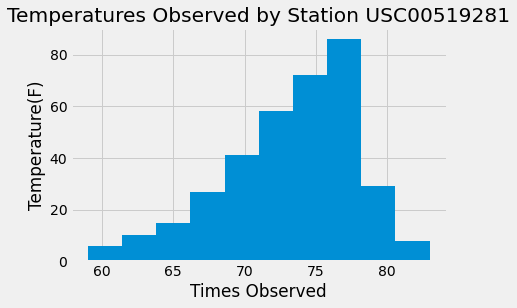

In [65]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

tempobs = session.query(measurement.tobs).filter(measurement.date >= year_before).filter(measurement.station == that[0][0]).all()
temps = []

for row in tempobs:
    temps.append(row[0])
    
plt.hist(temps)
plt.title("Temperatures Observed by Station " + str(that[0][0]))
plt.ylabel("Temperature(F)")
plt.xlabel("Times Observed")


# Close session

In [66]:
# Close Session
session.close()